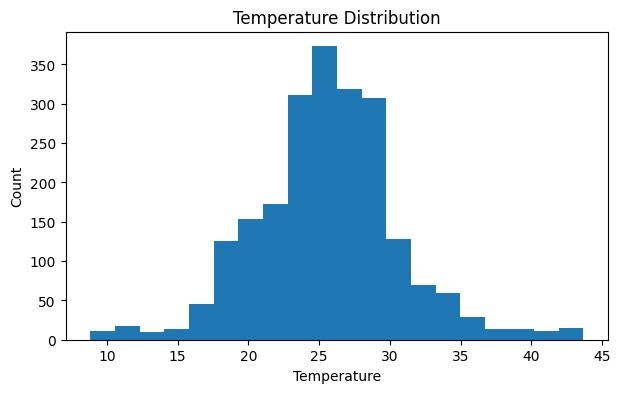

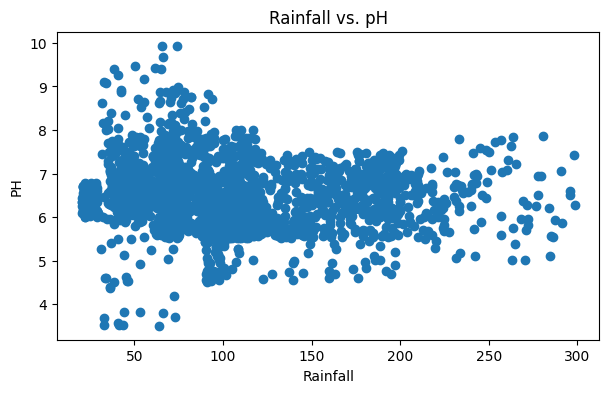

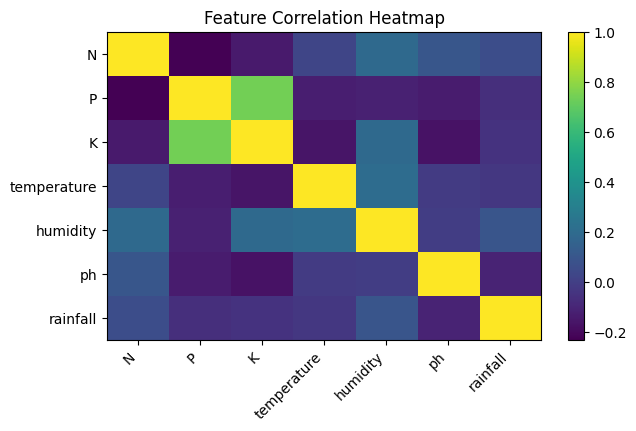

Model Accuracy: 0.9931818181818182


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load CSV Data
df = pd.read_csv("Crop_recommendation.csv")

# Histogram of the Temperature Feature
plt.figure(figsize=(7,4))
plt.hist(df['temperature'], bins=20)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

# Scatterplot Rainfall vs Soil pH
plt.figure(figsize=(7,4))
plt.scatter(df['rainfall'], df['ph'])
plt.title('Rainfall vs. pH')
plt.xlabel('Rainfall')
plt.ylabel('PH')
plt.show()

# Correlation Heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(7, 4))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Feature Correlation Heatmap")
plt.show()

# Split dataset into input features and target labels
X = df.drop("label", axis=1)
y = df["label"]

# Train Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model Accuracy:", model.score(X_test, y_test))

# Crop prediction function
def crop_prediction(N, P, K, temp, humidity, ph, rainfall):
    sample = [[N, P, K, temp, humidity, ph, rainfall]]
    return model.predict(sample)[0]

# UI widgets
N_slider        = widgets.IntSlider(value=50, min=0,  max=140, description='N:')
P_slider        = widgets.IntSlider(value=50, min=0,  max=140, description='P:')
K_slider        = widgets.IntSlider(value=50, min=0,  max=140, description='K:')
temp_slider     = widgets.FloatSlider(value=25, min=0,  max=50, description='Temp:')
humidity_slider = widgets.FloatSlider(value=70, min=0,  max=100, description='Humidity:')
ph_slider       = widgets.FloatSlider(value=7, min=0,  max=14, description='pH:')
rain_slider     = widgets.FloatSlider(value=150, min=0,  max=300, description='Rainfall (mm):')

predict_button = widgets.Button(description="Predict Crop", button_style="success")
output = widgets.Output()

# Button
def on_predict_clicked(b):
    with output:
        clear_output()  # Clears previous results
        crop = crop_prediction(
            N_slider.value,
            P_slider.value,
            K_slider.value,
            temp_slider.value,
            humidity_slider.value,
            ph_slider.value,
            rain_slider.value
        )
        print(f"Recommended Crop: {crop}")

predict_button.on_click(on_predict_clicked)

# Display UI
display(
    widgets.VBox([
        N_slider,
        P_slider,
        K_slider,
        temp_slider,
        humidity_slider,
        ph_slider,
        rain_slider,
        predict_button,
        output
    ])
)